# __`Day 11 Decision Tree Algorithm`__

## `Decision Tree`
A decision tree is a `tree-like structure` in machine learning where each node represents a feature, branches represent decisions, and leaf nodes denote outcomes or predictions, used for `classification and regression` tasks by recursively partitioning data based on features.

In [36]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.impute import SimpleImputer

In [37]:
# Load The Titanic Dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
# check null values 
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [39]:

# Drop the deck column
df.drop('deck', axis=1, inplace=True)

# Fill the Age and Fare column with median using simpleimputer
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# Fill the Embark and embarked_town with mode using simpleimputer 
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked', 'embark_town']] = imputer.fit_transform(df[['embarked', 'embark_town']])


In [40]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [41]:
# Encode the The Categorical and object features 
# Encode the categorical and object variables using for loop and labelencoder
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [42]:
# Check view the encoded Data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [43]:
# Split data into X and y from our dataset
X = df.drop(['survived' , 'adult_male'] , axis=1)
y = df['survived']

In [44]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)


Train data shape:  (712, 12)
Test data shape:  (179, 12)


In [45]:
# Call The Model
model = DecisionTreeClassifier()

# Fit the model 
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [50]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



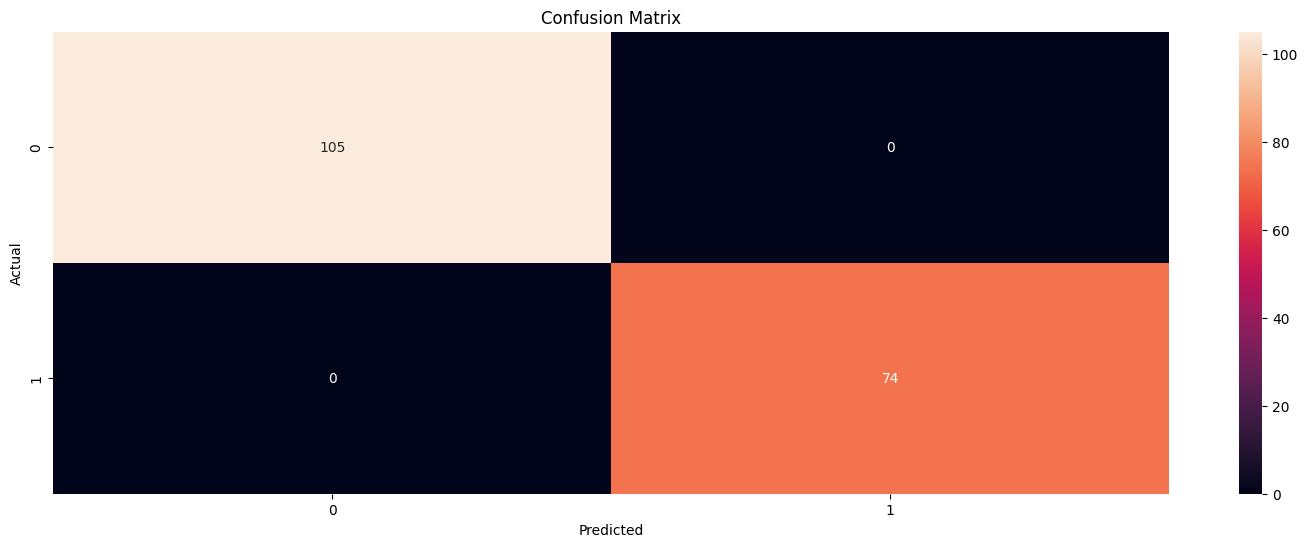

In [52]:
# Plot the Cond=fusion matrix using Heatmap
plt.figure(figsize=(18,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

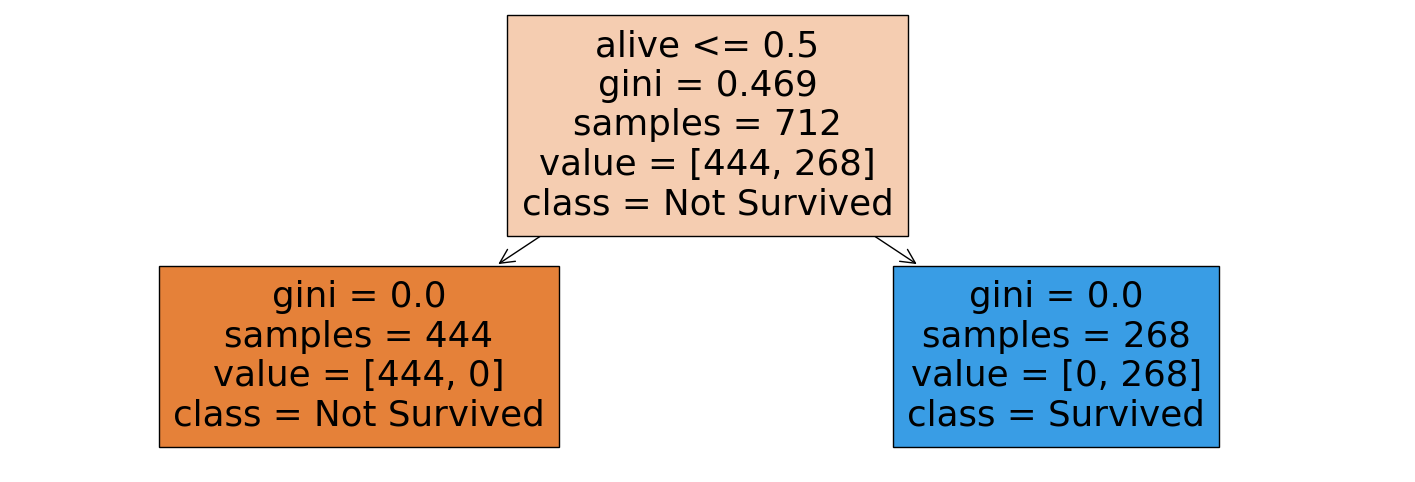

In [49]:

# Plot the Decision Tree
plt.figure(figsize=(18,6))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# __`Saved the Model `__

In [54]:
# Saved The Model
import pickle
pickle.dump(model, open('E:\Data_Sacience\\101-ML_Course\\Saved_Model_ML\\Decison_Tree_Classifier.pkl', 'wb'))